# AIM: To design a ANN model for classification of Data and compute the performace metrics by eveluating the trained model. Also analyze its performance on real data by plotting the performace metrics.

# Use Pytorch Framework and NumPy, Pandas and matplotlib libraries

In [1]:
import torch
import numpy as np

In [2]:
import torch.nn as nn
import torch.optim as optim

# Define dataset: OR Gate / Import dataset

In [3]:
X = torch.tensor([[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]])
y = torch.tensor([[0.0],[1.0],[1.0],[1.0]])

# Construct or Design a Neural network

In [4]:
class OR_ANN(nn.Module):
    def __init__(self):
        super(OR_ANN, self).__init__()
        self.linear = nn.Linear(2,1) # Inputs =2 output = 1
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Instanciate the model with loss and optimizer

In [5]:
model = OR_ANN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent

# Now Lets Train the model

In [6]:
type(X)

torch.Tensor

In [7]:
inputs = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])  # Input combinations
labels = torch.tensor([[0.0], [1.0], [1.0], [1.0]])  # Corresponding outputs for OR gate

In [8]:
# Modify training loop to collect loss values
losses = []
epochs = 1000
for epoch in range(epochs):
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.5165
Epoch [20/1000], Loss: 0.4508
Epoch [30/1000], Loss: 0.4124
Epoch [40/1000], Loss: 0.3872
Epoch [50/1000], Loss: 0.3688
Epoch [60/1000], Loss: 0.3543
Epoch [70/1000], Loss: 0.3421
Epoch [80/1000], Loss: 0.3314
Epoch [90/1000], Loss: 0.3219
Epoch [100/1000], Loss: 0.3131
Epoch [110/1000], Loss: 0.3049
Epoch [120/1000], Loss: 0.2972
Epoch [130/1000], Loss: 0.2899
Epoch [140/1000], Loss: 0.2830
Epoch [150/1000], Loss: 0.2764
Epoch [160/1000], Loss: 0.2700
Epoch [170/1000], Loss: 0.2640
Epoch [180/1000], Loss: 0.2582
Epoch [190/1000], Loss: 0.2527
Epoch [200/1000], Loss: 0.2473
Epoch [210/1000], Loss: 0.2422
Epoch [220/1000], Loss: 0.2373
Epoch [230/1000], Loss: 0.2325
Epoch [240/1000], Loss: 0.2279
Epoch [250/1000], Loss: 0.2235
Epoch [260/1000], Loss: 0.2193
Epoch [270/1000], Loss: 0.2152
Epoch [280/1000], Loss: 0.2112
Epoch [290/1000], Loss: 0.2074
Epoch [300/1000], Loss: 0.2036
Epoch [310/1000], Loss: 0.2001
Epoch [320/1000], Loss: 0.1966
Epoch [330/1000],

# Test the model

In [9]:
with torch.no_grad():
    test_outputs = model(inputs)
    predicted = (test_outputs > 0.5).float()  # Convert probabilities to binary predictions
    print("\nTesting Results:")
    print("Inputs:\n", inputs.numpy())
    print("Predicted Outputs:\n", predicted.numpy())
    print("Actual Outputs:\n", labels.numpy())
    print(test_outputs)


Testing Results:
Inputs:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Predicted Outputs:
 [[0.]
 [1.]
 [1.]
 [1.]]
Actual Outputs:
 [[0.]
 [1.]
 [1.]
 [1.]]
tensor([[0.1818],
        [0.9309],
        [0.9278],
        [0.9987]])


# Evaluation and Visualization: Model Performance Evaluation

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Function to evaluate performance

In [11]:
def evaluate_model(model, inputs, labels):
    with torch.no_grad():
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Convert probabilities to binary predictions

        # Calculate metrics
        accuracy = accuracy_score(labels.numpy().flatten(), predicted.numpy().flatten())
        precision = precision_score(labels.numpy().flatten(), predicted.numpy().flatten())
        recall = recall_score(labels.numpy().flatten(), predicted.numpy().flatten())
        f1 = f1_score(labels.numpy().flatten(), predicted.numpy().flatten())


        print("\nPerformance Metrics:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")

        # Confusion Matrix
        cm = confusion_matrix(labels.numpy(), predicted.numpy())
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.show()

In [12]:
# Plot training loss
def plot_loss_curve(losses):
    plt.plot(losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.grid()
    plt.show()

In [13]:
# Visualize decision boundary
def plot_decision_boundary(model):
    # Define the grid range for plotting
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
    
    # Reshape the grid for model input
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)  # Shape: (10000, 2)
    
    with torch.no_grad():
        outputs = model(grid)  # Pass the grid through the model
        Z = (outputs > 0.5).float().reshape(xx.shape)  # Convert outputs to binary and reshape
    
    # Plot decision boundary
    plt.contourf(xx.numpy(), yy.numpy(), Z.numpy(), alpha=0.7, cmap=plt.cm.Paired)
    plt.scatter(inputs[:, 0].numpy(), inputs[:, 1].numpy(), c=labels.numpy().flatten(), edgecolor="k", cmap=plt.cm.Paired)
    plt.title("Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


Performance Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


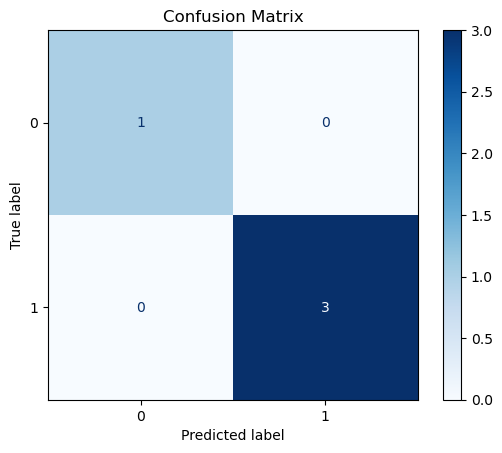

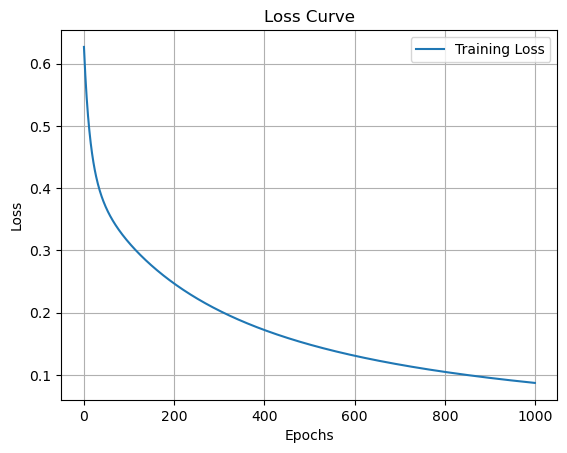

C:\Users\Dr.PVVK\anaconda3\Lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


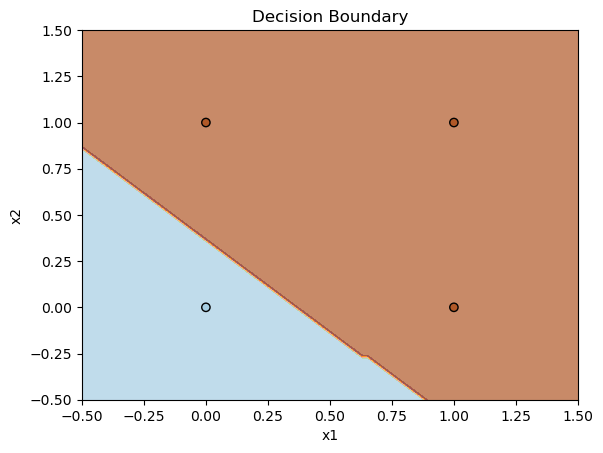

In [14]:
# Evaluate and visualize
evaluate_model(model, inputs, labels)
plot_loss_curve(losses)
plot_decision_boundary(model)

# TO Replicate the same Code for XOR Gate with two layers

In [15]:
# Define the XOR Neural Network Model
class XOR_ANN(nn.Module):
    def __init__(self):
        super(XOR_ANN, self).__init__()
        self.hidden = nn.Linear(2, 2)  # 2 input features, 4 hidden units
        self.output = nn.Linear(2, 1)  # 4 hidden units, 1 output
        self.sigmoid = nn.Sigmoid()  # Activation function for binary classification

    def forward(self, x):
        x = self.hidden(x)
        x = torch.relu(x)  # ReLU activation for the hidden layer
        x = self.output(x)
        x = self.sigmoid(x)  # Sigmoid activation for the output layer
        return x

In [16]:
labels = torch.tensor([[0.0], [1.0], [1.0], [0.0]])  # Corresponding outputs for XOR gate

# Initialize model, loss function, and optimizer
model = XOR_ANN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent

# Training loop
epochs = 5000
losses = []
for epoch in range(epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [500/5000], Loss: 0.3861
Epoch [1000/5000], Loss: 0.3539
Epoch [1500/5000], Loss: 0.3501
Epoch [2000/5000], Loss: 0.3486
Epoch [2500/5000], Loss: 0.3480
Epoch [3000/5000], Loss: 0.3477
Epoch [3500/5000], Loss: 0.3475
Epoch [4000/5000], Loss: 0.3473
Epoch [4500/5000], Loss: 0.3472
Epoch [5000/5000], Loss: 0.3471



Performance Metrics:
Accuracy: 0.75
Precision: 0.67
Recall: 1.00
F1 Score: 0.80


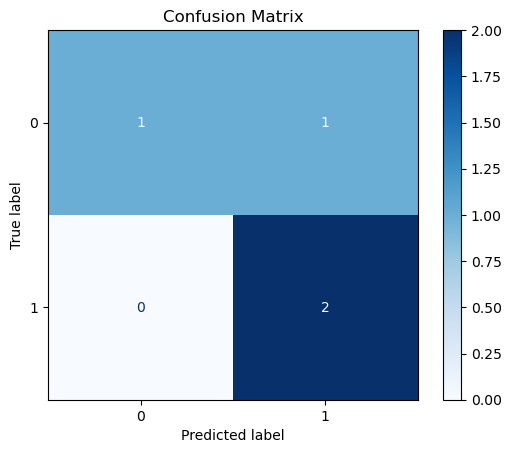

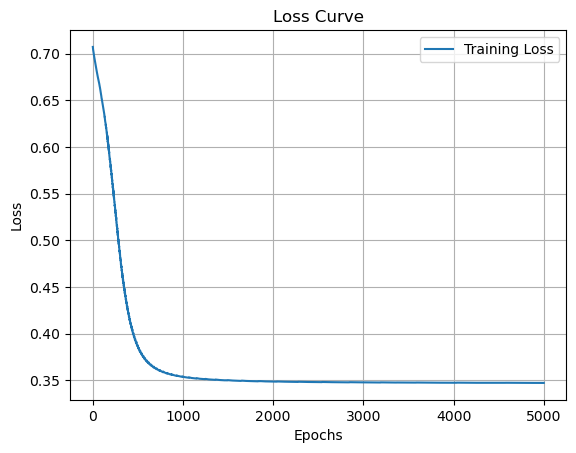

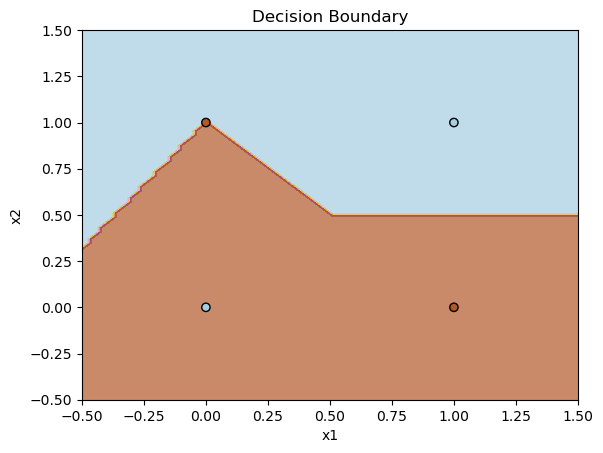

In [17]:
# Evaluate and visualize
evaluate_model(model, inputs, labels)
plot_loss_curve(losses)
plot_decision_boundary(model)

# On Real Built - in dataset

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and Preprocess the Iris Dataset

In [19]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal and petal lengths and widths
y = iris.target  # Labels: Iris species (0, 1, 2)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# Encode labels if needed (already in numerical form for Iris dataset)
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize the features for better training performance
X[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [21]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Long type for classification
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [22]:
X_train_tensor.shape

torch.Size([120, 4])

# Define the Neural Network Model

In [23]:
class IrisMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(IrisMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()  # Activation for hidden layers

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer (no activation since we use CrossEntropyLoss)
        return x

# Train the Model

In [24]:
# Initialize the model, loss function, and optimizer
input_dim = X.shape[1]
hidden_dim = 16  # Arbitrary choice
output_dim = len(iris.target_names)  # 3 classes for Iris species

model = IrisMLP(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
batch_size = 16
losses = []

for epoch in range(epochs):
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        epoch_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(epoch_loss / len(X_train_tensor))
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss / len(X_train_tensor):.4f}")

Epoch [10/100], Loss: 0.0102
Epoch [20/100], Loss: 0.0056
Epoch [30/100], Loss: 0.0041
Epoch [40/100], Loss: 0.0034
Epoch [50/100], Loss: 0.0032
Epoch [60/100], Loss: 0.0045
Epoch [70/100], Loss: 0.0031
Epoch [80/100], Loss: 0.0032
Epoch [90/100], Loss: 0.0029
Epoch [100/100], Loss: 0.0029


# Evaluate the Model and Make predictions on the test tensor


Test Accuracy: 1.00


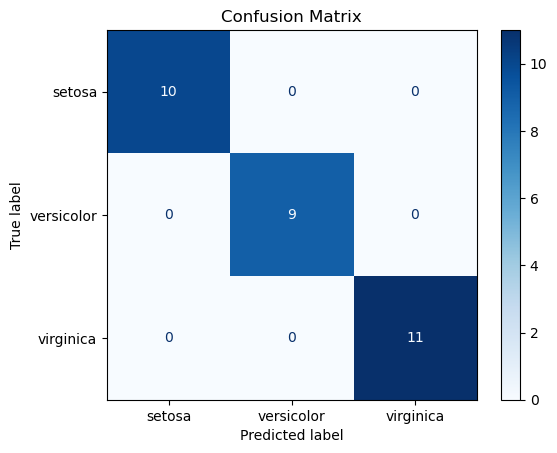

In [25]:
# Evaluate the model on test data
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)  # Predicted class

# Accuracy
accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
print(f"\nTest Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_tensor.numpy(), y_pred.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

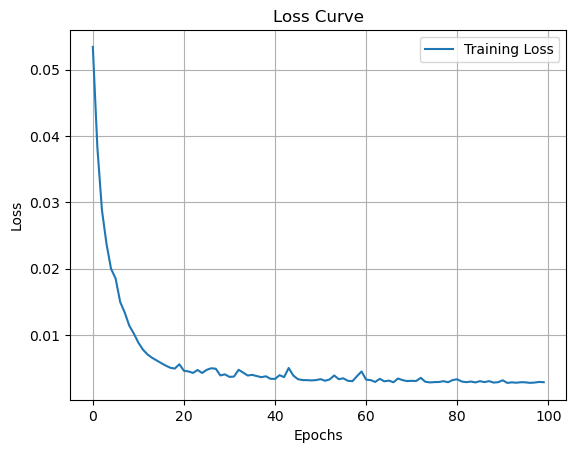

In [26]:
# Plot training loss
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [28]:
y_pred_np = y_pred.numpy()
y_test_np = y_test_tensor.numpy()
# Classification report
report = classification_report(y_test_np, y_pred_np, target_names=iris.target_names)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# plot decision boundary with moons dataset 

In [29]:
from sklearn.datasets import make_moons

In [30]:
# Generate the dataset (binary classification)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for MLP performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [31]:
class MoonsMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MoonsMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x)

In [32]:
# Initialize the model, criterion, and optimizer
input_dim = X_train.shape[1]
hidden_dim = 16
output_dim = 1  # Binary classification
model = MoonsMLP(input_dim, hidden_dim, output_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
batch_size = 32
losses = []

for epoch in range(epochs):
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        epoch_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(epoch_loss / len(X_train_tensor))
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss / len(X_train_tensor):.4f}")

Epoch [10/1000], Loss: 0.0076
Epoch [20/1000], Loss: 0.0041
Epoch [30/1000], Loss: 0.0030
Epoch [40/1000], Loss: 0.0027
Epoch [50/1000], Loss: 0.0026
Epoch [60/1000], Loss: 0.0025
Epoch [70/1000], Loss: 0.0024
Epoch [80/1000], Loss: 0.0024
Epoch [90/1000], Loss: 0.0024
Epoch [100/1000], Loss: 0.0024
Epoch [110/1000], Loss: 0.0024
Epoch [120/1000], Loss: 0.0024
Epoch [130/1000], Loss: 0.0023
Epoch [140/1000], Loss: 0.0023
Epoch [150/1000], Loss: 0.0022
Epoch [160/1000], Loss: 0.0022
Epoch [170/1000], Loss: 0.0022
Epoch [180/1000], Loss: 0.0021
Epoch [190/1000], Loss: 0.0021
Epoch [200/1000], Loss: 0.0021
Epoch [210/1000], Loss: 0.0020
Epoch [220/1000], Loss: 0.0020
Epoch [230/1000], Loss: 0.0020
Epoch [240/1000], Loss: 0.0020
Epoch [250/1000], Loss: 0.0020
Epoch [260/1000], Loss: 0.0020
Epoch [270/1000], Loss: 0.0020
Epoch [280/1000], Loss: 0.0019
Epoch [290/1000], Loss: 0.0019
Epoch [300/1000], Loss: 0.0020
Epoch [310/1000], Loss: 0.0019
Epoch [320/1000], Loss: 0.0020
Epoch [330/1000],

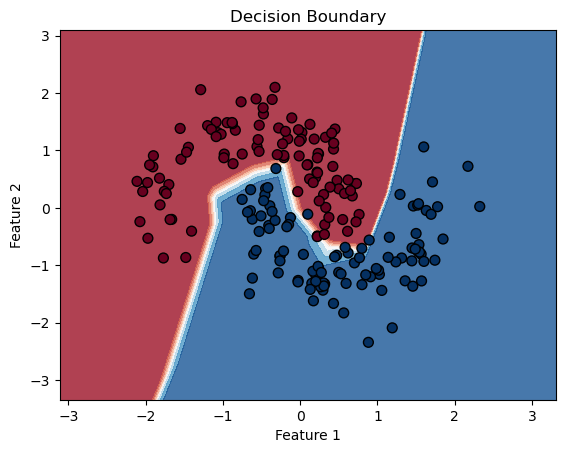

In [33]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, plot_title="Decision Boundary"):
    # Create a grid of points to evaluate the model
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Flatten the grid and make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_tensor = torch.tensor(grid_points, dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid_points_tensor)
        Z = Z.numpy().reshape(xx.shape)
    
    # Plot the contour and training data
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.RdBu)
    plt.title(plot_title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary for the test set
plot_decision_boundary(model, X_test, y_test)
